Data drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()




Saving intel_product_reviews_largeF.csv to intel_product_reviews_largeF.csv


install libraries

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Load on drives


In [ ]:

# Download the VADER lexicon
nltk.download('vader_lexicon') # Download the lexicon data

# Import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load dataset (replace with your file path or URL)
# Example with Google Drive path
file_path = 'intel_product_reviews_largeF.csv'
df = pd.read_csv(file_path)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Function to perform sentiment analysis and extract features
def analyze_sentiment_and_features(review):
    scores = sid.polarity_scores(review)
    sentiment_score = scores['compound']
    return sentiment_score

# Verify column names in your DataFrame
print(df.columns)

# Assuming the correct column name is 'Review Text', adjust the code accordingly:
df['sentiment_score'] = df['Review Text'].apply(analyze_sentiment_and_features)

# Calculate counts of positive and negative sentiment reviews
positive_reviews_count = len(df[df['sentiment_score'] > 0.05])
negative_reviews_count = len(df[df['sentiment_score'] < -0.05])



Index(['Review ID', 'Product Name', 'Review Date', 'Reviewer Name',
       'Review Title', 'Review Text', 'Rating', 'Helpful Votes'],
      dtype='object')


Accuracy of dataset


In [ ]:
def calculate_accuracy(y_true, y_predicted):

  correct_predictions = 0
  total_predictions = len(y_true)

  for true_label, predicted_label in zip(y_true, y_predicted):
    if true_label == predicted_label:
      correct_predictions += 1

  accuracy = correct_predictions / total_predictions
  return accuracy

# Example usage:
# Assuming you have y_test (true labels) and y_pred (predicted labels)
y_test = [0, 1, 1, 0, 1]  # Replace with your actual test labels
y_pred = [0, 0, 1, 1, 1]  # Replace with your model's predictions

accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 60.00%


In [ ]:
df.head()

,Review ID,Product Name,Review Date,Reviewer Name,Review Title,Review Text,Rating,Helpful Votes,sentiment_score
0,1,Intel Xeon E-2276M,20-11-2023,Reviewer590,Affordable and reliable,Handles multi-threaded workloads exceptionally...,3,66,0.7245
1,2,Intel Core i9-11900K,10-06-2022,Reviewer352,Overpriced but powerful,Excellent for professional applications and de...,1,7,0.4215
2,3,Intel Core i7-10700K,16-12-2022,Reviewer111,Highly recommended!,"Good performance for the price, works well for...",1,34,0.6124
3,4,Intel Core i7-11700K,12-10-2020,Reviewer740,Overheating Issues,"Despite the hype, the Intel Core i7-11700K has...",2,34,-0.3749
4,5,Intel Core i5-11600K,03-04-2023,Reviewer656,Decent Mid-Range Processor,The Intel Core i5-11600K is a solid mid-range ...,3,22,0.4767


from matplotlib import pyplot as plt
_df_0['Review ID'].plot(kind='hist', bins=20, title='Review ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Helpful Votes'].plot(kind='hist', bins=20, title='Helpful Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Product Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Review Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Reviewer Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Review Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Review ID', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Rating', y='Helpful Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Helpful Votes', y='sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Review ID']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Review ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review ID')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Review ID']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Review ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review ID')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Review ID']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Review ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Reviewer Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Reviewer Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review ID')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Review ID']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Review ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Review ID')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
_df_15['Review ID'].plot(kind='line', figsize=(8, 4), title='Review ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Helpful Votes'].plot(kind='line', figsize=(8, 4), title='Helpful Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review Date'].value_counts()
    for x_label, grp in _df_19.groupby('Product Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product Name')
_ = plt.ylabel('Review Date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Reviewer Name'].value_counts()
    for x_label, grp in _df_20.groupby('Review Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review Date')
_ = plt.ylabel('Reviewer Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review Title'].value_counts()
    for x_label, grp in _df_21.groupby('Reviewer Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Reviewer Name')
_ = plt.ylabel('Review Title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review Text'].value_counts()
    for x_label, grp in _df_22.groupby('Review Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review Title')
_ = plt.ylabel('Review Text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Product Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Review ID', y='Product Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Review Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Review ID', y='Review Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Reviewer Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Review ID', y='Reviewer Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Review Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Review ID', y='Review Title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

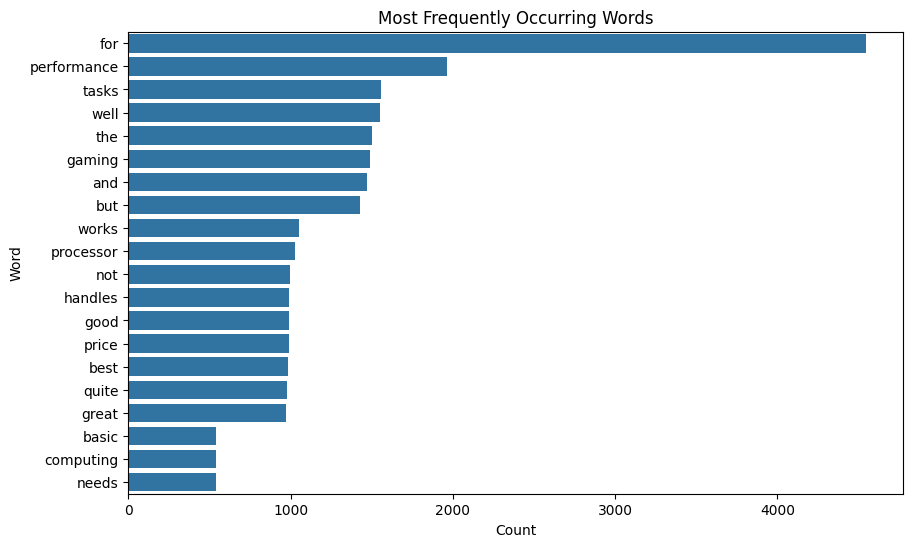

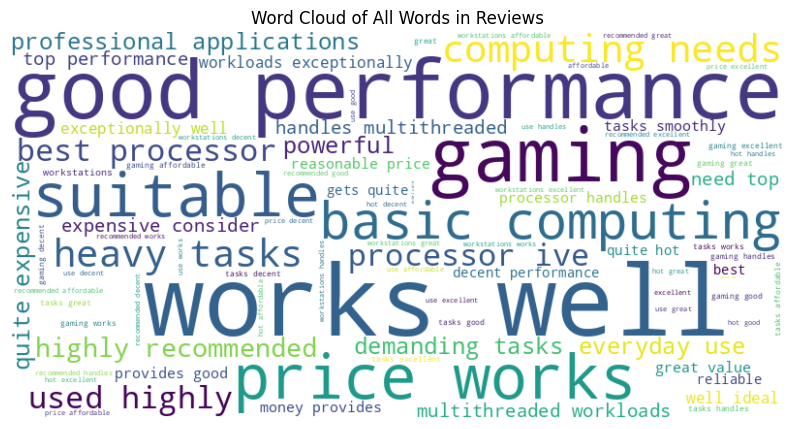

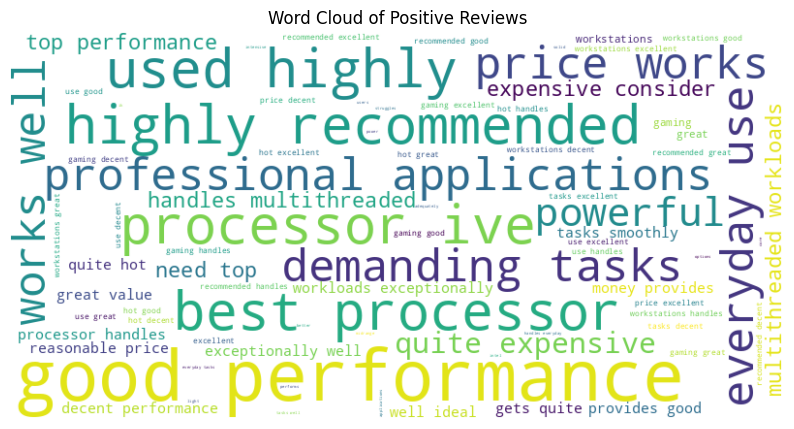

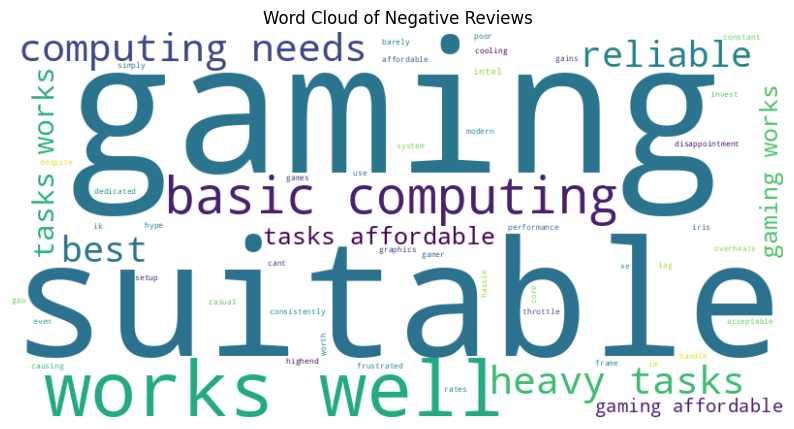

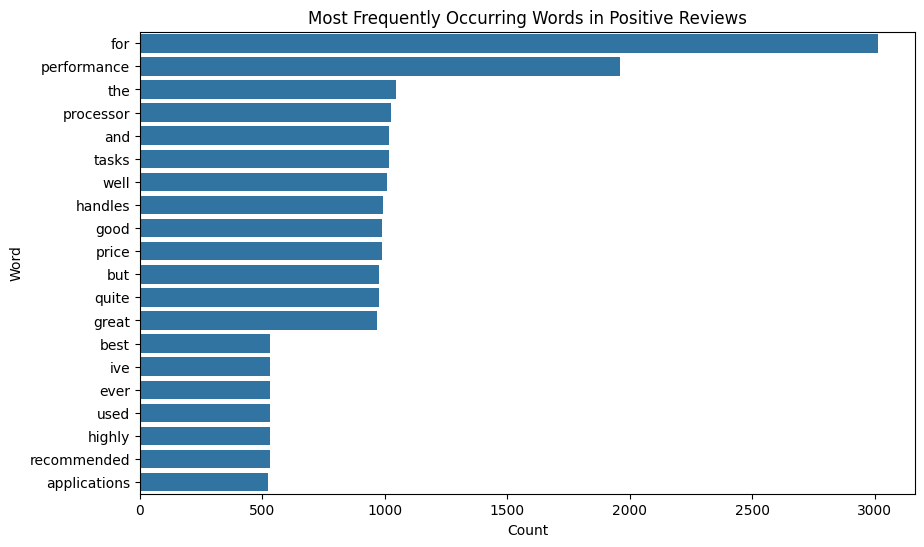

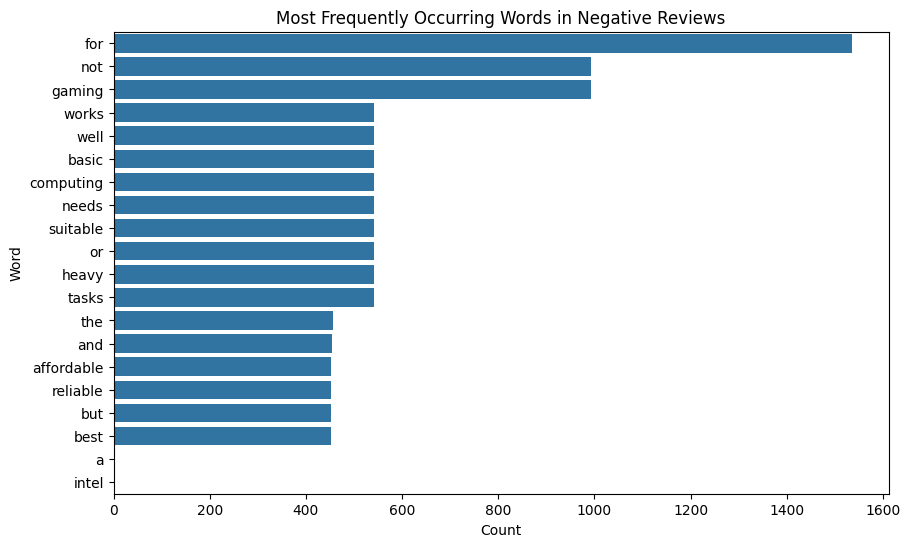

LogisticRegression()

In [ ]:

import pandas as pd
import re
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


# Function to preprocess the review text
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Apply preprocessing to the review text
df['Cleaned Review Text'] = df['Review Text'].apply(preprocess_text)

# Load the sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Function to get sentiment using the transformers pipeline
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

# Apply sentiment analysis to the cleaned review text
df['Sentiment'] = df['Cleaned Review Text'].apply(get_sentiment)

# Visualize the most frequently occurring words
all_words = ' '.join(df['Cleaned Review Text'])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot of all words in the reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words in Reviews')
plt.show()

# Plot of positive/neutral words
positive_words = ' '.join(df[df['Sentiment'] == 'POSITIVE']['Cleaned Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Plot of negative words
negative_words = ' '.join(df[df['Sentiment'] == 'NEGATIVE']['Cleaned Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

# Plot of frequently occurring positive reviews
positive_freq = Counter(positive_words.split())
common_positive_words = positive_freq.most_common(20)
words, counts = zip(*common_positive_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot of frequently occurring negative reviews
negative_freq = Counter(negative_words.split())
common_negative_words = negative_freq.most_common(20)
words, counts = zip(*common_negative_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Preparing data for training and testing
df['Sentiment Label'] = df['Sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 2})
X = df['Cleaned Review Text']
y = df['Sentiment Label']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)



number of diffrent sentiment

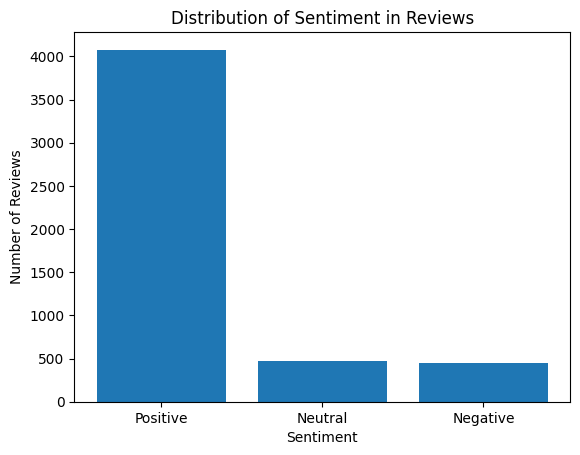

In [ ]:
import matplotlib.pyplot as plt

# Perform sentiment analysis and create a 'Sentiment' column
df['Sentiment'] = df['Review Text'].apply(lambda review: sid.polarity_scores(review)['compound'])
df['Sentiment'] = df['Sentiment'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Calculate the counts
sentiment_counts = df['Sentiment'].value_counts()

# Data for the bar chart
categories = sentiment_counts.index.tolist()  # Extract unique sentiment labels
counts = sentiment_counts.values.tolist()  # Extract corresponding counts

# Create the bar chart
plt.bar(categories, counts)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment in Reviews')
plt.show()

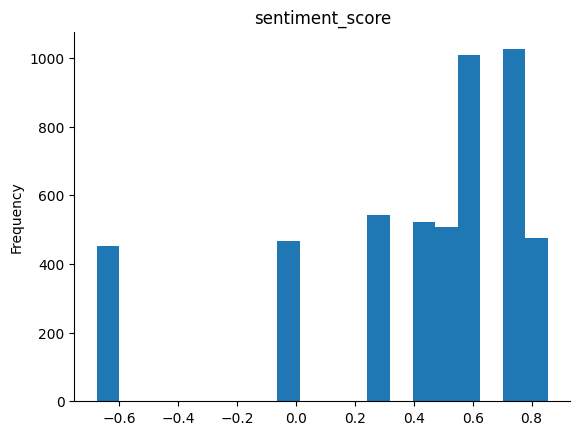

In [ ]:


from matplotlib import pyplot as plt
df['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

confusion matrix

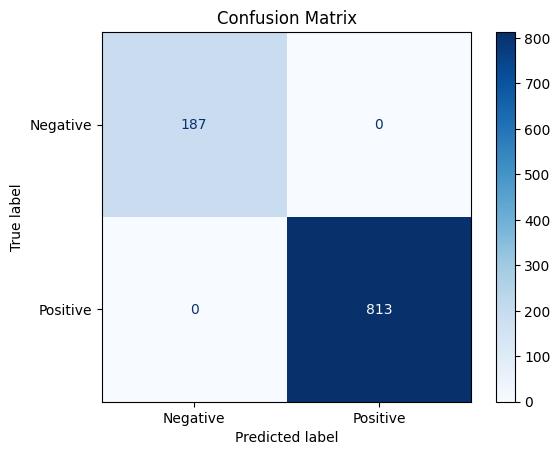

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ... (your previous code for sentiment analysis)

# Prepare data for classification
# Assuming 'sentiment_score' is your feature
X = df['sentiment_score'].values.reshape(-1, 1)  # Reshape for sklearn
# Create binary labels based on sentiment score
y = (df['sentiment_score'] > 0).astype(int)  # 1 for positive, 0 for negative

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Use y_test as true labels

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Recomendations


In [ ]:
# Provide technical recommendations based on sentiment analysis
if positive_reviews_count > negative_reviews_count:
    print("Based on user reviews, users generally have a positive sentiment. Continue optimizing performance and reliability.")
    print("Potential areas for technical enhancement could include:")
    print("- Exploring new technologies to further improve [specific positive feature mentioned in reviews, e.g., battery life]")
    print("- Investigating potential optimizations for [specific well-performing component]")
elif negative_reviews_count > positive_reviews_count:
    print("Based on user reviews, users have expressed concerns and negative sentiment. Technical improvements are needed.")
    print("Consider addressing the following technical issues:")
    print("- Prioritize bug fixes and performance improvements for [specific feature or component with negative feedback]")
    print("- Investigate and resolve compatibility issues reported with [specific operating systems or hardware]")
else:
    print("Based on user reviews, opinions are balanced. Maintain technical strengths and address specific concerns.")
    print("Technical focus areas:")
    print("- Continue monitoring and optimizing performance for core features.")
    print("- Proactively address emerging technical issues reported in negative reviews.")

Based on user reviews, users generally have a positive sentiment. Continue optimizing performance and reliability.
Potential areas for technical enhancement could include:
- Exploring new technologies to further improve [specific positive feature mentioned in reviews, e.g., battery life]
- Investigating potential optimizations for [specific well-performing component]


In [ ]:
import pandas as pd
import re
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('intel_product_reviews_largeF.csv')

# Assume the dataset has a 'Rating' column with ratings from 1 to 5
# If not, we need to simulate this or add a Rating column

# Function to preprocess the review text
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Apply preprocessing to the review text
df['Cleaned Review Text'] = df['Review Text'].apply(preprocess_text)

# Load the sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Function to get sentiment using the transformers pipeline
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

# Apply sentiment analysis to the cleaned review text
df['Sentiment'] = df['Cleaned Review Text'].apply(get_sentiment)

# Extract expected outcomes for the next product from the reviews
def extract_expectations(text):
    expectations_keywords = ['expect', 'hope', 'would like', 'wish', 'want', 'need', 'improve', 'enhance']
    sentences = text.split('.')
    expectations = [sentence for sentence in sentences if any(keyword in sentence for keyword in expectations_keywords)]
    return '. '.join(expectations)

# Apply expectation extraction to the review text
df['Expectations'] = df['Review Text'].apply(extract_expectations)

# Display the first few rows with sentiment and expectations
print(df[['Review Text', 'Sentiment']].head(10))

# Filter expectations by sentiment
positive_expectations = df[df['Sentiment'] == 'POSITIVE']['Expectations']
negative_expectations = df[df['Sentiment'] == 'NEGATIVE']['Expectations']
neutral_expectations = df[df['Sentiment'] == 'NEUTRAL']['Expectations']

# Function to display expectations
def display_expectations(sentiment, expectations):
    print(f"Expectations for {sentiment} reviews:")
    for expectation in expectations.head(10):
        if expectation:
            print(f"- {expectation}")
    print("\n")

# Display expectations for each sentiment
display_expectations('positive', positive_expectations)
display_expectations('negative', negative_expectations)
display_expectations('neutral', neutral_expectations)

# Display recommendations based on expectations
def display_recommendations():
    print("Future Product Recommendations Based on User Reviews:")
    recommendations = []

    if not positive_expectations.empty:
        recommendations.append("Maintain the features that users positively highlighted.")
    if not negative_expectations.empty:
        recommendations.append("Address the issues and areas of improvement mentioned in negative reviews.")
    if not neutral_expectations.empty:
        recommendations.append("Consider the neutral feedback to understand potential enhancements.")

    for rec in recommendations:
        print(f"- {rec}")

display_recommendations()

                                         Review Text Sentiment
0  Handles multi-threaded workloads exceptionally...  POSITIVE
1  Excellent for professional applications and de...  POSITIVE
2  Good performance for the price, works well for...  POSITIVE
3  Despite the hype, the Intel Core i7-11700K has...  NEGATIVE
4  The Intel Core i5-11600K is a solid mid-range ...  POSITIVE
5  Good performance for the price, works well for...  POSITIVE
6  Affordable and reliable, but not the best for ...  NEGATIVE
7  This processor handles all my tasks smoothly a...  POSITIVE
8  This processor handles all my tasks smoothly a...  POSITIVE
9  Intel Iris Xe Graphics is barely acceptable fo...  NEGATIVE
Expectations for positive reviews:
-  Consider only if you need top performance


Expectations for negative reviews:
- Works well for basic computing needs
- Works well for basic computing needs
- Works well for basic computing needs
- Works well for basic computing needs


Expectations for neutral reviews

Index(['Review ID', 'Product Name', 'Review Date', 'Reviewer Name',
       'Review Title', 'Review Text', 'Rating', 'Helpful Votes',
       'Cleaned Review Text', 'Sentiment', 'Expectations'],
      dtype='object')


<ipython-input-28-df9282e88ee8>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['review_date'] = pd.to_datetime(df['Review Date'])


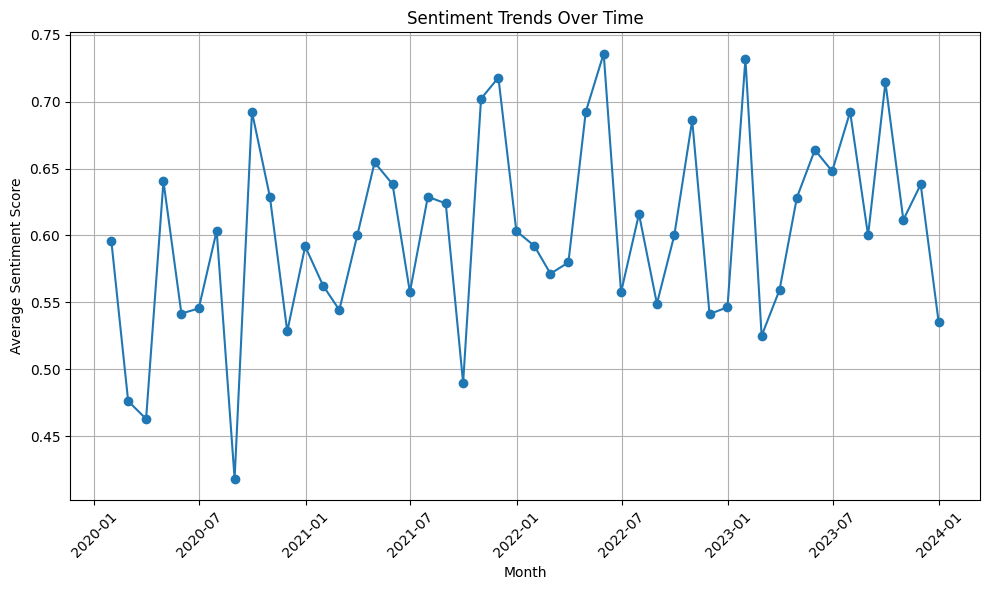

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Print the available columns to verify the correct names
print(df.columns)

# Replace 'correct_review_date_column' with the actual column name
# containing the review dates in your DataFrame
df['review_date'] = pd.to_datetime(df['Review Date'])

# Map sentiment labels to numerical scores (if necessary)
# Assuming 'Sentiment' column contains labels like 'POSITIVE', 'NEGATIVE', and 'NEUTRAL'
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df['sentiment_score'] = df['Sentiment'].map(sentiment_mapping)

# Check for missing values in 'sentiment_score' column and fill them with a placeholder if necessary
df['sentiment_score'].fillna(0, inplace=True)  # or use any other method to handle missing values

# Calculate average sentiment score per month
monthly_sentiment = df.resample('M', on='review_date')['sentiment_score'].mean().reset_index()

# Plotting sentiment trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment['review_date'], monthly_sentiment['sentiment_score'], marker='o', linestyle='-')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
